# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Qonita Azizah
- **Email:** qonitaazh@gmail.com
- **ID Dicoding:** b25b9d046

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang digunakan dengan nilai transaksi tertinggi (maximal)?
- Negara manakah yang memiliki jumlah pelanggan terbanyak dan paling sedikit?
- Negara manakah yang memiliki jumlah seller terbanyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
#Muat data Customers
customers_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/customers_dataset.csv")
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [188]:
#Muat data Geolocation
geolocation_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/geolocation_dataset.csv")
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [189]:
#Muat data Order Items
order_items_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/order_items_dataset.csv")
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [190]:
#Muat data Order Payment
order_payments_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/order_payments_dataset.csv")
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [191]:
#Muat data Orders
orders_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/orders_dataset.csv")
orders_df.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [192]:
#Muat data Sellers
sellers_dataset_df = pd.read_csv("/content/drive/MyDrive/E-Commerce_Dataset/sellers_dataset.csv")
sellers_dataset_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset berhasil dimuat kedalam google collab

### Assessing Data

In [193]:
#Menilai data customer_df untuk memastika data tiap kolom sesuai
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [194]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
customers_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
Tidak ada masalah dalam data customers_df

In [195]:
#Menilai data geolocation_df untuk memastikan data tiap kolom sesuai
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [196]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
geolocation_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Terdapat data yang terduplikasi pada geolocation_df.

In [197]:
#Menilai data order_items_df untuk memastikan data tiap kolom sesuai
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [198]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
order_items_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Insight:

Terdapat kesalahan tipe data untuk kolom shipping_limit_date

In [199]:
#Menilai data order_payments_df untuk memastikan data tiap kolom sesuai
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [200]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
order_payments_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
Tidak ada masalah dalam data order_payments_df

In [201]:
#Menilai data order_df untuk memastikan data tiap kolom sesuai
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [202]:
orders_df.isna().sum() #Melakukan pengecekkan kolom yang terdapat missing value

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [203]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
orders_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


***Insight***
- Terdapat missing value pada kolom order_approved_at	, order_delivered_carrier_date,  order_delivered_customer_date
- Deskripsi hanya menampilkan count, unique, top, freq karena semua kolom bertipe object
- Terdapat kesalahan tipe data untuk kolom order_approved_at, order_delivered_carrier_date,  order_delivered_customer_date

In [204]:
#Menilai data sellers_dataset_df untuk memastikan data tiap kolom sesuai
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [205]:
print("Jumlah duplikasi: ", sellers_dataset_df.duplicated().sum()) #Untuk melakukan pengecekkan data yang duplikat
sellers_dataset_df.describe() #Untuk melihat deskripsi data

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Pada data Customers_df tidak terdapat masalah pada data
- Pada data geolocation_df terdapat duplikasi
- Pada data order_items_df terdapat kesalahan type data pada data untuk kolom shipping_limit_date
- pada data order_riviews_df terdapat missing value pada kolom riview_comment_tittle dan riview comment message
- pada data orders_df terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. terdapat kesalahan type data pada order_purchase_timestamp ,order_approved_at ,order_delivered_carrier_date,order_delivered_customer_date , dan order_estimated_delivery_date
- pada data product_category_name_translation_df tidak terdapat masalah
- pada data products_dataset_df terdapat missing value pada kolom product_category_name, product_name_lenght, dan product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
- pada data sellers_dataset_df tidak terdapat masalah.

### Cleaning Data

In [206]:
geolocation_df.drop_duplicates(inplace=True) #Menghapus Duplikat

In [207]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- menghapus duplikasi pada geolocation_df untuk menangani duplikat pada data

In [208]:
#Mengubah tipe data pada kolom shipping_limit_date menjadi date time
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Insight:

Menyesuikan tipe data pada kolom shipping_limit_date yang merupakan waktu

In [209]:
#Mengubah tipe data pada kolom "order_purchase_timestamp" ,"order_approved_at" ,"order_delivered_carrier_date","order_delivered_customer_date" , "order_estimated_delivery_date" menjadi date time
datetime_columns = ["order_purchase_timestamp" ,"order_approved_at" ,"order_delivered_carrier_date","order_delivered_customer_date" , "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [210]:
orders_df[orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [211]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [212]:
orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum() #Menampilkan jumlah kolom data yang mengalami misisng value

,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965


In [213]:
#Mengelommpkan data kolom
delivered_df = orders_df[orders_df['order_status'] == 'delivered']
non_delivered_df = orders_df[orders_df['order_status'] != 'delivered']


In [214]:
#Mengganti data yang missing value menjadi "not applicable"
non_delivered_df[['order_approved_at',
                  'order_delivered_carrier_date',
                  'order_delivered_customer_date']] = 'Not Applicable'


/tmp/ipython-input-19475600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_delivered_df[['order_approved_at',


In [215]:
orders_df = pd.concat([delivered_df, non_delivered_df], ignore_index=True) # menggabung data kolom yang telah dibersihkan

In [216]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [217]:
#mengganti data yang masih mengalami missing value
customers_df.fillna(value="Invalid", inplace=True)

In [218]:
orders_df.isna().sum()


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


**Insight:**
- Membersihkan data duplikat geolocation_df
- mengubah tipe data yang keliru pada kolom shipping_limit_date pada data order_items_df
- mengganti missing value pada kolom riview_comment_tittle dan riview comment message
- mengubah tipe data yang keliru dan mengganti missing value menggunakan rata" pada pesanan pada data orders_df
- Mengganti missing value pada data products_dataset dimana product_category_name yg mengalami missing di ganti dengan kata unknown. untuk product_name_lenght, dan product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm di ganti dengan median pada setiap kategori.

## Exploratory Data Analysis (EDA)

### Explore ...

In [219]:
order_payments_df.describe(include="all") #menampilkan keseluruhan data pada order_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [220]:
#mengelompokkan berdasarkan type payment transaksi yg tertinggi
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
     "payment_value" : ["max","min","mean","median"]
})

order_id payment_value                           
              nunique           max    min        mean  median
payment_type                                                  
boleto          19784       7274.88  11.62  145.034435   93.89
credit_card     76505      13664.08   0.01  163.319021  106.87
debit_card       1528       4445.50  13.38  142.570170   89.30
not_defined         3          0.00   0.00    0.000000    0.00
voucher          3866       3184.34   0.00   65.703354   39.28

**Insight** Terdapat melihat Not defined dapat terjadi kemungkinan transaksi sebelum memilih metode pembayaran, atau pembayarannya gagal diproses. Sistem kemudian mencatat pesanan ini dengan nilai pembayaran 0 dan tipe pembayaran kosong. karena jumlah nya sedikit maka akan dilakukan penghapusan pada not_defined tersebut

In [221]:
#menghapus kolom
payment_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']

# memeriksa 'not_defined' sudah hilang
print(payment_df['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card']


In [222]:
#mengelompokkan berdasarkan type payment transaksi yg tertinggi
payment_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
     "payment_value" : ["max","min","mean","median"]
})

order_id payment_value                           
              nunique           max    min        mean  median
payment_type                                                  
boleto          19784       7274.88  11.62  145.034435   93.89
credit_card     76505      13664.08   0.01  163.319021  106.87
debit_card       1528       4445.50  13.38  142.570170   89.30
voucher          3866       3184.34   0.00   65.703354   39.28

**Insight**
- metode paling banyak di gunakan  dan juga memiliki nilai transaksi tertinggi. Metode ini yang paling mejadi favorit

**Insidght**
- Disini kita mengetahui maksimal dan minimum total transaksi berdasar payment_type

In [223]:
customers_df.describe(include="all") #menampilkan keseluruhan data pada order_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [224]:
#mengelompokkan customer berdasarkan state
bycustomer_df = customers_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
bycustomer_df.rename(columns={
    "customer_unique_id": "customer_count"
}, inplace=True)
bycustomer_df

,customer_state,customer_count
0,AC,77
1,AL,401
2,AM,143
3,AP,67
4,BA,3277
5,CE,1313
6,DF,2075
7,ES,1964
8,GO,1952
9,MA,726


**Insight:**
- Mengelompokkan customer berdasarkan state untuk melihat count atau total dari jumlah customer

In [225]:
#mengelompokkan seller berdasarkan state
byseller_df = sellers_dataset_df.groupby(by="seller_state").seller_id.nunique().reset_index()
byseller_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
byseller_df

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


**Insight:**
- Mengelompokkan seller berdasarkan state untuk melihat count atau total dari jumlah seller

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-2467295305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


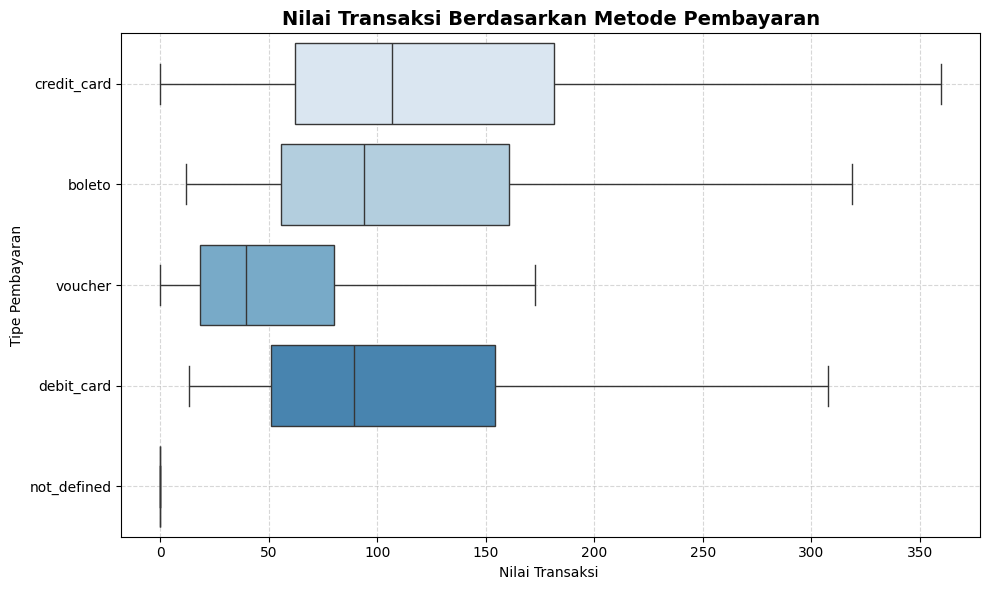

In [226]:
#Visualisasi data order_payment untuk mengethau minimal dan maksima metode pembayan yang digunakan
plt.figure(figsize=(10,6))
sns.boxplot(
    data=order_payments_df,
    x="payment_value",
    y="payment_type",
    showfliers=False,  # agar outlier ekstrem tidak mengganggu visual
    palette="Blues"
)

plt.title("Nilai Transaksi Berdasarkan Metode Pembayaran", fontsize=14, fontweight='bold')
plt.xlabel("Nilai Transaksi ")
plt.ylabel("Tipe Pembayaran")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


**Insight:**
- Disini kita dapat dapat melihat minimal dan maksimal nilai trnaksi yang berdasarkan type paymentnya
- Credit card memiliki nilai transaksi paling tinggi

### Pertanyaan 2:

/tmp/ipython-input-358700153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-358700153.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=True).head(5), palette=colors, ax=ax[1])


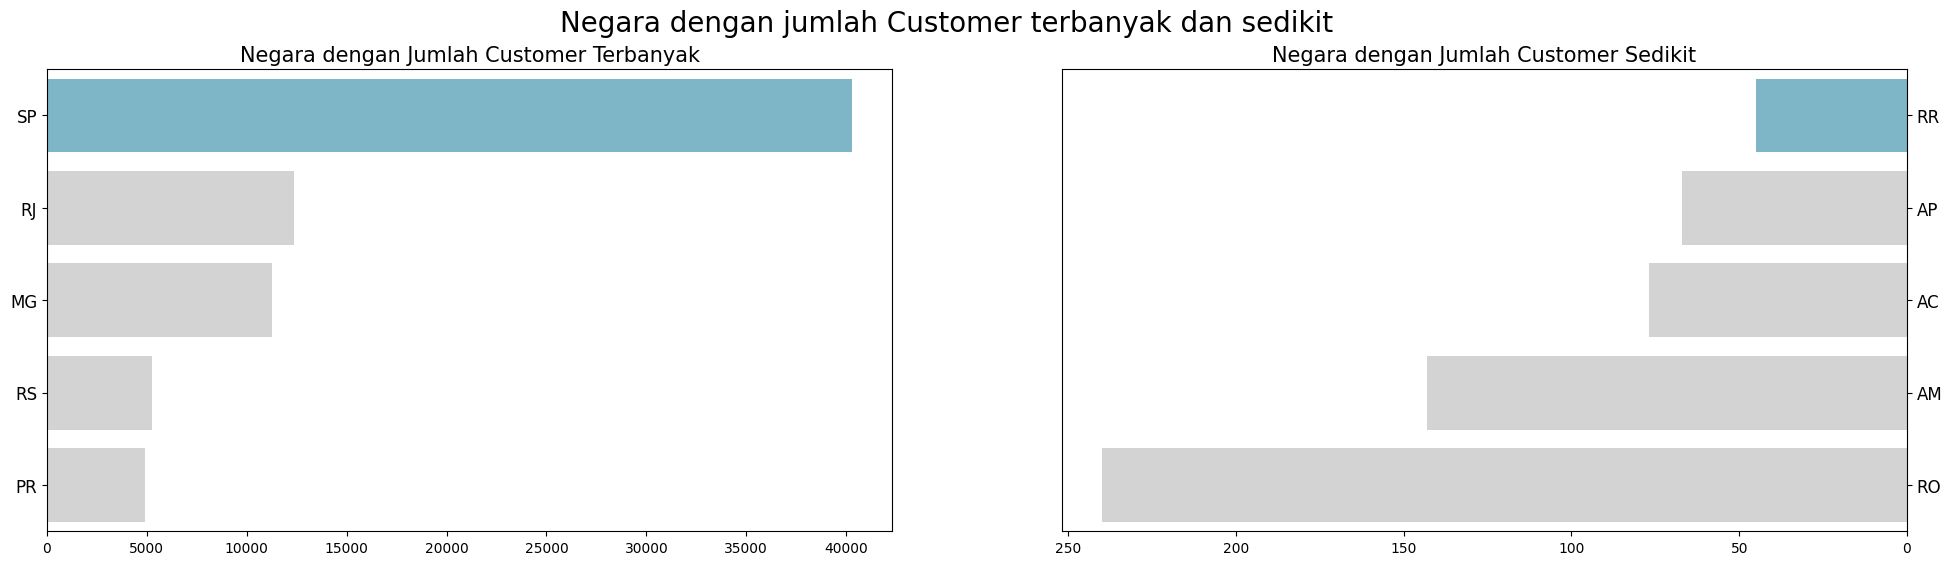

In [227]:
#visualisasi bar untuk melihat customer tertinggi pada setiap state
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Negara dengan Jumlah Customer Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="customer_count", y="customer_state", data=bycustomer_df.sort_values(by="customer_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Negara dengan Jumlah Customer Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Negara dengan jumlah Customer terbanyak dan sedikit", fontsize=20)
plt.show()

**Insight:**

Disini kita dapat melihat data setiap negara yang memiliki customer terbanyak dan sedikit

### Pertanyaan 3:

/tmp/ipython-input-668644825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=False).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-668644825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=True).head(5), palette=colors, ax=ax[1])


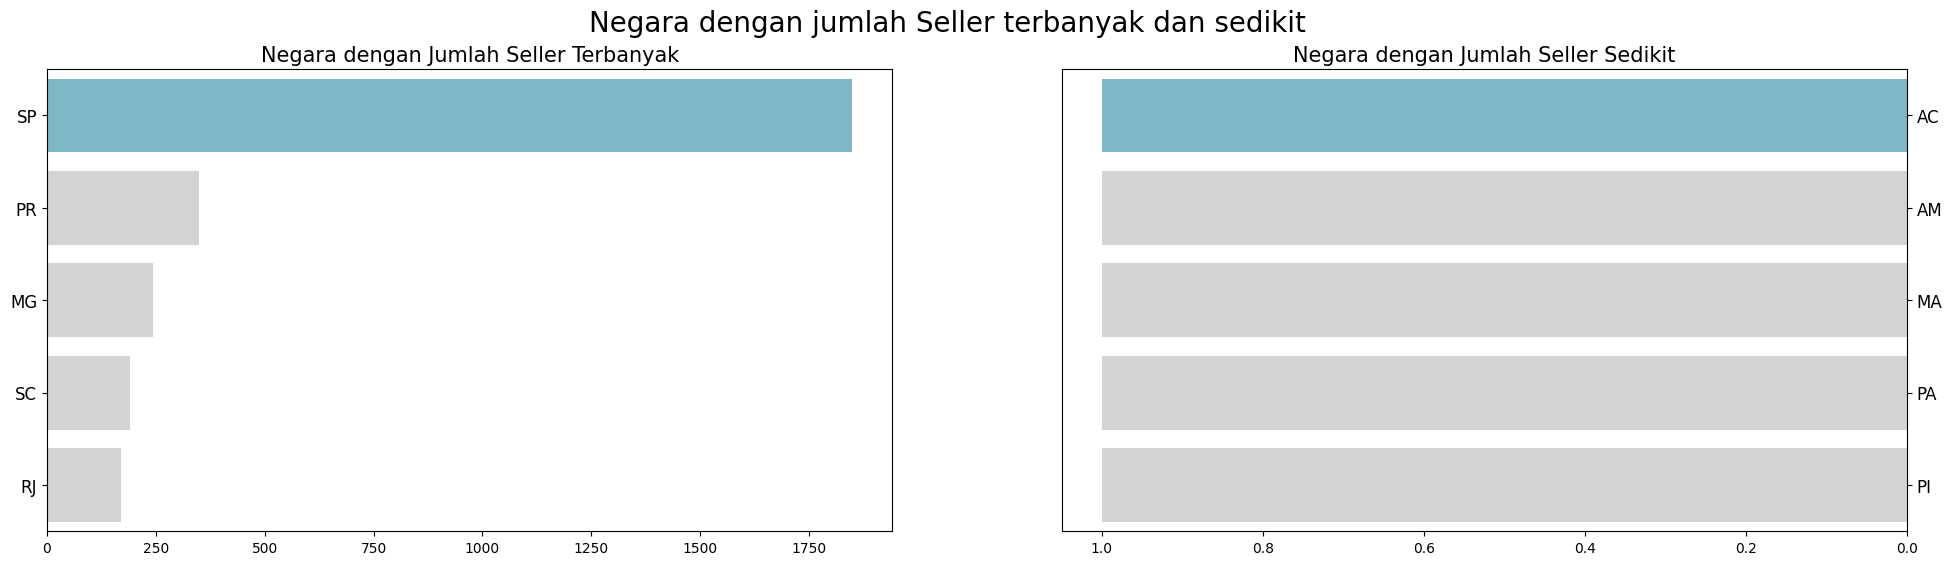

In [228]:
#visualisasi bar untuk melihat seller tertinggi dan terendah pada setiap state
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Negara dengan Jumlah Seller Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="seller_count", y="seller_state", data=byseller_df.sort_values(by="seller_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Negara dengan Jumlah Seller Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Negara dengan jumlah Seller terbanyak dan sedikit", fontsize=20)
plt.show()

**Insight:**
- Disini kita dapat melihat data setiap negara yang memiliki seller terbanyak dan sedikit

## Analisis Lanjutan (Opsional)

In [229]:
order_full = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_full.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [230]:
rfm_df = order_full.groupby(by="order_id", as_index=False).agg({
    "shipping_limit_date": "max", # mengambil tanggal order terakhir
    "order_item_id": "nunique", # menghitung jumlah order unik dalam pesanan
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["order_id", "max_shipping_limit_date", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_shipping_limit_date"] = rfm_df["max_shipping_limit_date"].dt.date
recent_date = rfm_df["max_shipping_limit_date"].max() # Get the maximum date from the aggregated data
rfm_df["recency"] = rfm_df["max_shipping_limit_date"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_shipping_limit_date", axis=1, inplace=True)
rfm_df.head()

,order_id,frequency,monetary,recency
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,933
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,1072
2,000229ec398224ef6ca0657da4fc703e,1,199.00,812
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,603
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,1151


In [231]:
rfm_df['order_short_id'] = rfm_df['order_id'].str.slice(start=0, stop=4)

/tmp/ipython-input-2161096452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="order_short_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-2161096452.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="order_short_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-2161096452.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="order_short_id", data=rfm_df.sort

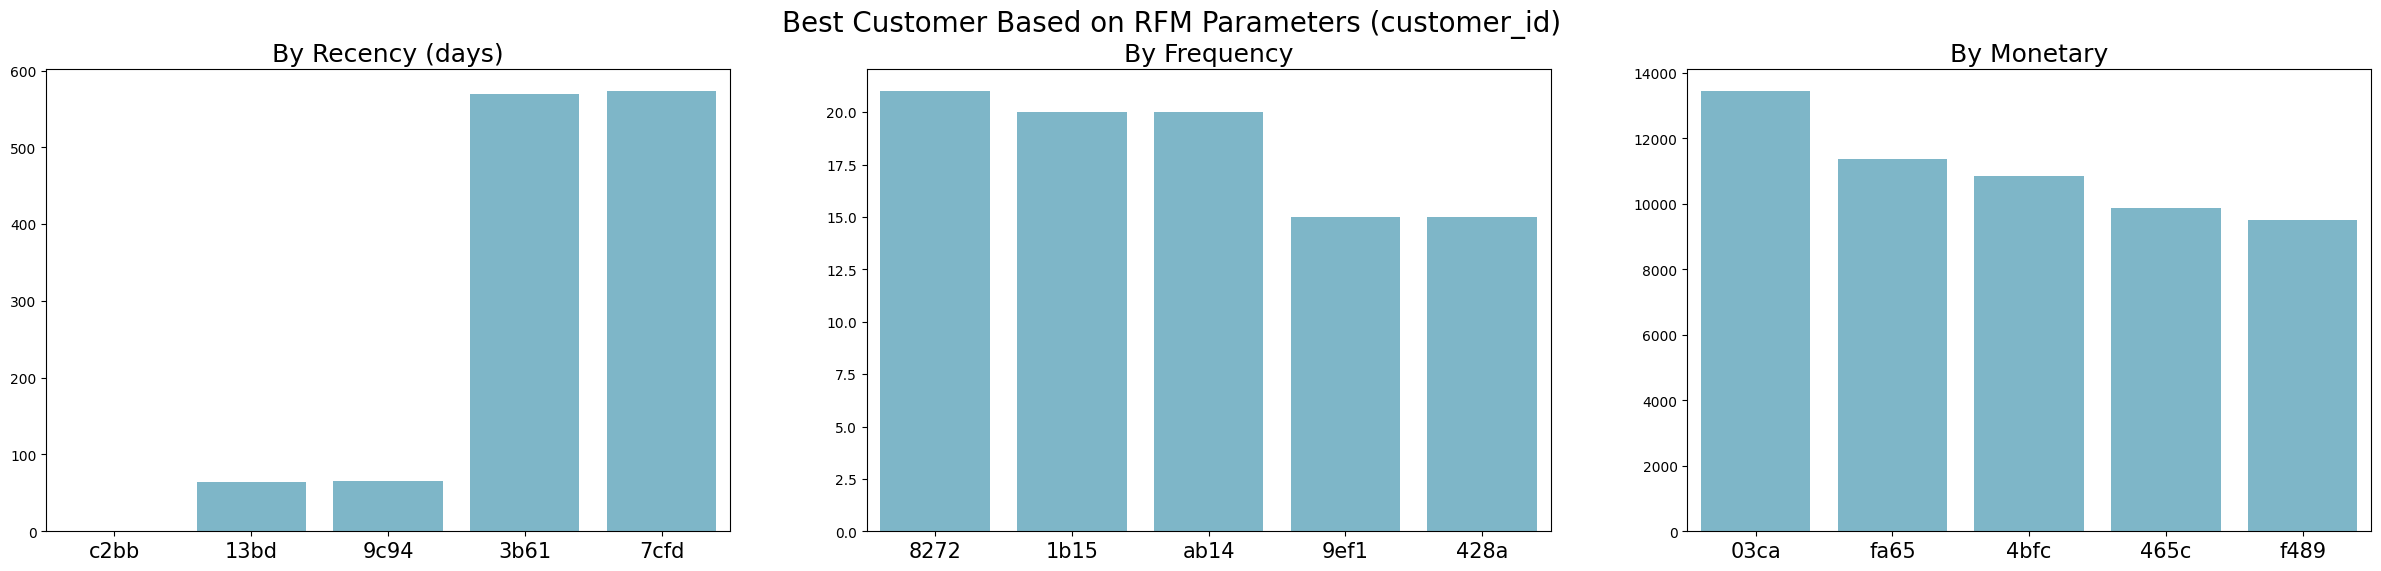

In [232]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="order_short_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="order_short_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="order_short_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Transaksi yang besar biasany menggunakan kredit card, sehingga untuk strategi bisnis kedepanya dapat memberikan voucher dengan dengan S&K terdapat minimal pembelian.
- Conclution pertanyaan 2&3: Analisis menunjukkan bahwa wilayah "SP" mendominasi pasar secara signifikan, baik dari jumlah pelanggan maupun penjual. Oleh karena itu, strategi yang diusulkan adalah: mempertahankan loyalitas di pasar negara "SP" dengan voucher gratis ongkir. Untuk merangsang permintaan di area sepi pelanggan dengan promosi hiperlokal dari penjual terdekat dan mendukung penjual baru di area sepi penjual dengan insentif seperti komisi 0% atau subsidi ongkir.

In [236]:
order_full.to_csv("order_full.csv", index=False)

In [238]:
from google.colab import files
files.download("order_full.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [233]:
# Correcting the function name to pd.to_datetime for date columns
# order_items_df["dteday"] = pd.to_datetime(order_items_df["dteday"]) # Assuming 'dteday' exists and is a date column
# order_payments_df["dteday"] = pd.to_datetime(order_payments_df["dteday"]) # Assuming 'dteday' exists and is a date column
# customers_df["dteday"] = pd.to_datetime(customers_df["dteday"]) # Assuming 'dteday' exists and is a date column
# geolocation_df["dteday"] = pd.to_datetime(geolocation_df["dteday"]) # Assuming 'dteday' exists and is a date column
# order_full["dteday"] = pd.to_datetime(order_full["dteday"]) # Assuming 'dteday' exists and is a date column
# sellers_dataset_df["dteday"] = pd.to_datetime(sellers_dataset_df["dteday"]) # Assuming 'dteday' exists and is a date column

# The following lines were causing a NameError because all_df was not defined.
# Assuming the goal is to save one of the existing dataframes,
# you need to replace 'all_df' with the name of the dataframe you want to save.
# Example: To save the 'orders_df' dataframe:

# from google.colab import files
# orders_df.to_csv('orders_df.csv', index=False)
# files.download('orders_df.csv')

# Or if you intended to merge dataframes into all_df, you need to perform the merge first.

# The line below also causes a NameError because all_df is not defined.
# all_df.to_csv("all_date", index=False)
# print("data csv berhasil dibuat: all_df.csv")



In [234]:
# from google.colab import files


# # Blok 'try' ini untuk menangkap error jika salah satu
# # DataFrame Anda ada yang belum terdefinisi (misal: 'order_full')
# try:
#     # 1. Membuat daftar semua DataFrame Anda
#     data_frames = {

#         "order_full.csv": order_full
#         # Pastikan 'order_full' sudah Anda buat
#     }

#     print("Memulai proses penyimpanan dan unduh...")

#     # 2. Loop untuk menyimpan dan mengunduh setiap file
#     for nama_file, df in data_frames.items():

#         # 3. Simpan DataFrame ke file CSV
#         df.to_csv(nama_file, index=False)

#         # 4. Cetak pesan sukses
#         print(f"Berhasil menyimpan: {nama_file}")

#         # 5. Memicu download
#         files.download(nama_file)
#         print(f"Mengunduh {nama_file}...")

#     print("--- Selesai ---")

# except NameError as e:
#     print(f"--- GAGAL ---")
#     print(f"Error: {e}")
#     print("\nPastikan Anda sudah memuat (me-running) sel untuk SEMUA DataFrame yang Anda sebutkan.")
# except Exception as e:
#     print(f"--- GAGAL: Terjadi error tak terduga ---")
#     print(f"Error: {e}")